In [47]:
#input image
#Import package
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function for Visualising Images
def imshow(img):
    plt.axis('off')
    plt.imshow(img, 'gray')
    plt.show()

def adjust_gamma(image,gamma=1.0):
    table=np.array([((i / 255.0) ** gamma ) * 255 for i in np.arange(0,256)]).astype("unit8")
    return cv2.LUT(image,table)


Original Image


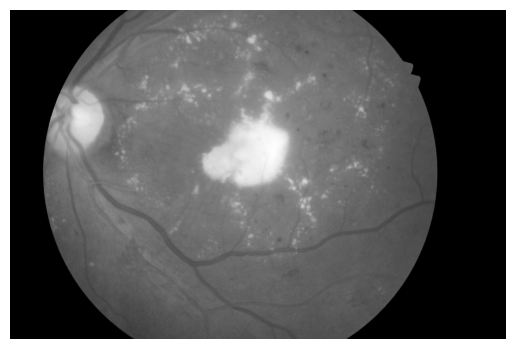

In [48]:
#Input image
image_path = "data/images/test/"
image_path = "data/images/training/"


# images = os.listdir(image_path)
# images.sort()
# print(image_path + "IDRiD_10.jpg" )
img= cv2.imread(image_path + "IDRiD_10.jpg",cv2.IMREAD_GRAYSCALE)
print("Original Image")

imshow(img)

Binary Image


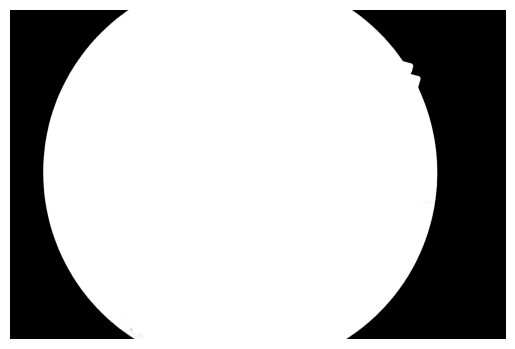

In [49]:
#binarization with Otsu
ret, img_bin=cv2.threshold(img,10,256,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print("Binary Image")
imshow(img_bin)

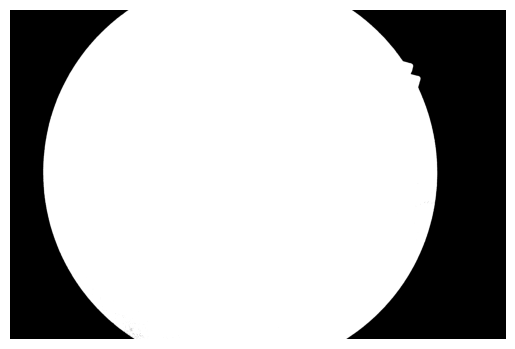

True

In [50]:
# Opening 3 x 3 to remove noise
sOP = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
morph_open = cv2.morphologyEx(img_bin,cv2.MORPH_OPEN,sOP)
imshow(morph_open)
cv2.imwrite("morph_open.jpg",morph_open)


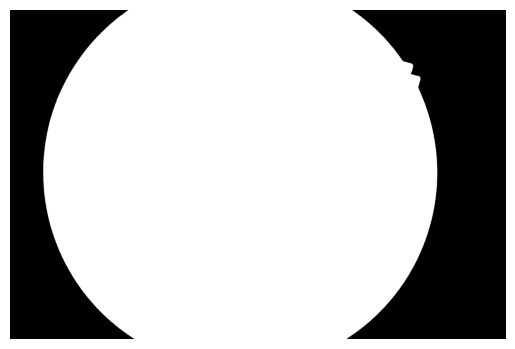

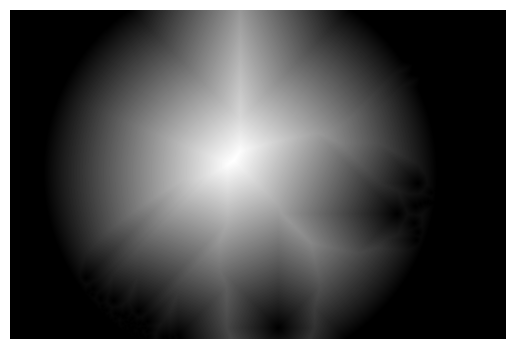

In [51]:
#distance transfor
img_bin_closed= cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE,
		cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)))
imshow(img_bin_closed)

dist_transform= cv2.distanceTransform(img_bin, cv2.NORM_L1, 3)
imshow(dist_transform)

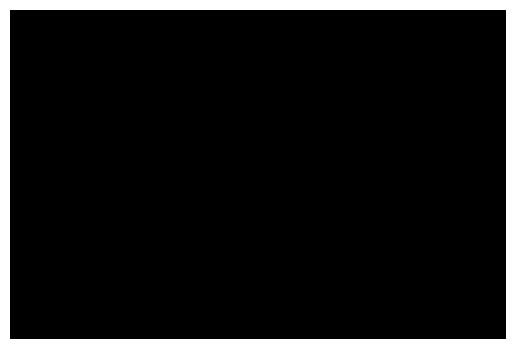

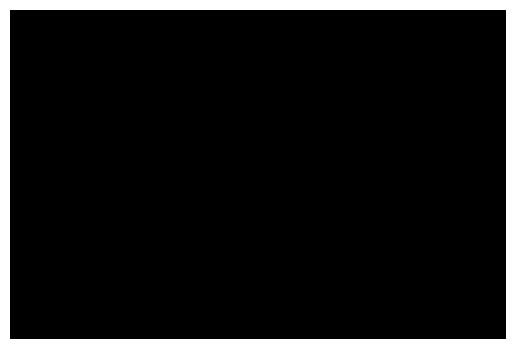

In [52]:
#thresholdin
dist_transform_vis=cv2.normalize(dist_transform, 0, 255, cv2.NORM_MINMAX)
dist_transform_vis=dist_transform_vis.astype(np.uint8)

imshow(dist_transform_vis)
ret, dist_transform_vis1=cv2.threshold(dist_transform_vis, 0.5*255, 255, cv2.THRESH_BINARY)
imshow(dist_transform_vis1)

In [53]:
#extranal markers

In [54]:
#watershed result